In [77]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import seaborn as sns #visualisation
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [3]:
df_ire = pd.read_excel('/Users/Noel/Documents/MSc_CA2/ireland-cattle-prices.xlsx')

In [4]:
df_GB = pd.read_excel('/Users/Noel/Documents/MSc_CA2/gt.-britain-cattle-prices.xlsx')

In [5]:
df_NI = pd.read_excel('/Users/Noel/Documents/MSc_CA2/n.ireland-cattle-prices.xlsx')

In [6]:
df_ire.head()

,Date,Bulls R3 (Ire),Cows O2 (Ire),Cows O3 (Ire),Cows O4 (Ire),Cows P2 (Ire),Cows P3 (Ire),Cows R2 (lre),Cows R3 (Ire),Cows R4 (Ire),...,Steers R4 (Ire),Steers U2 (Ire),Steers U3 (Ire),Steers U4 (Ire),Young Bulls O2 (Ire),Young Bulls O3 (Ire),Young Bulls R2 (Ire),Young Bulls R3 (Ire),Young Bulls U2 (Ire),Young Bulls U3 (Ire)
0,2019-10-28,241.6,255.0,259.2,259.7,228.6,247.7,NaN,279.6,279.3,...,341.3,347.9,352.5,347.3,299.0,303.8,321.6,320.5,330.2,329.8
1,2019-10-14,239.9,264.6,268.3,268.5,235.1,256.0,NaN,288.9,288.0,...,342.1,350.7,353.7,349.1,300.9,305.3,323.7,322.3,332.8,332.3
2,2019-10-07,248.3,270.1,274.2,274.6,242.9,262.0,NaN,296.1,293.7,...,343.9,349.8,353.3,350.4,301.1,306.4,325.7,323.4,337.0,334.6
3,2019-09-30,253.0,277.9,279.9,278.4,252.7,267.1,NaN,298.4,297.1,...,344.3,351.7,356.2,354.0,305.6,309.9,327.5,327.7,336.7,337.1
4,2019-09-16,264.2,283.3,283.9,282.5,257.2,272.6,NaN,302.0,300.1,...,338.1,344.8,347.7,344.1,301.5,309.4,322.0,321.5,328.8,327.8


In [7]:
df_GB.head()

,Date,Bulls R3 (GB),Cows O2 (GB),Cows O3 (GB),Cows O4 (GB),Cows P2 (GB),Cows P3 (GB),Cows R2 (GB),Cows R3 (GB),Cows R4 (GB),...,Steers R4 (GB),Steers U2 (GB),Steers U3 (GB),Steers U4 (GB),Young Bulls O2 (GB),Young Bulls O3 (GB),Young Bulls R2 (GB),Young Bulls R3 (GB),Young Bulls U2 (GB),Young Bulls U3 (GB)
0,2019-10-28,NaN,252.77,266.37,263.37,219.89,236.80,NaN,288.79,285.63,...,385.91,383.28,385.29,385.26,319.95,331.13,367.02,367.70,377.09,376.32
1,2019-10-14,NaN,256.21,271.56,269.63,224.17,241.91,NaN,295.12,290.06,...,382.44,376.88,380.92,380.53,320.19,333.11,358.54,361.61,367.22,368.08
2,2019-10-07,NaN,259.75,270.55,269.38,227.57,243.22,NaN,293.35,290.60,...,374.72,368.98,373.09,371.68,305.38,315.40,349.96,352.82,365.36,358.62
3,2019-09-30,NaN,265.76,277.86,275.99,228.87,245.73,NaN,299.64,295.03,...,374.68,369.29,373.44,372.25,314.47,318.96,349.43,352.10,364.10,359.26
4,2019-09-16,NaN,268.41,279.53,280.31,234.09,251.72,NaN,302.45,299.38,...,375.37,372.10,374.81,373.85,311.01,327.14,353.86,355.03,365.75,362.23


In [8]:
df_NI.head()

,Date,Bulls R3 (NI),Cows O2 (NI),Cows O3 (NI),Cows O4 (NI),Cows P2 (NI),Cows P3 (NI),Cows R2 (NI),Cows R3 (NI),Cows R4 (NI),...,Steers R4 (NI),Steers U2 (NI),Steers U3 (NI),Steers U4 (NI),Young Bulls O2 (NI),Young Bulls O3 (NI),Young Bulls R2 (NI),Young Bulls R3 (NI),Young Bulls U2 (NI),Young Bulls U3 (NI)
0,2019-10-28,NaN,281.17,287.40,291.62,244.74,262.73,NaN,310.58,309.34,...,376.43,370.43,371.74,370.12,337.37,345.89,354.79,360.64,359.13,358.31
1,2019-10-14,NaN,280.32,283.92,287.52,245.51,263.74,NaN,307.67,304.68,...,365.48,367.34,367.62,358.68,329.29,333.71,353.09,356.86,353.88,361.26
2,2019-10-07,NaN,270.94,279.31,280.89,240.13,256.85,NaN,300.71,301.58,...,359.08,356.23,359.15,354.70,321.27,329.39,347.95,352.07,348.90,351.14
3,2019-09-30,NaN,276.37,280.91,283.62,242.76,258.08,NaN,303.12,301.85,...,361.77,359.17,360.16,353.60,324.38,332.57,344.37,345.92,349.15,350.59
4,2019-09-16,NaN,271.46,281.83,285.10,240.83,260.85,NaN,302.02,301.51,...,357.45,358.83,361.05,357.50,325.69,331.77,347.26,359.39,352.49,356.83


In [9]:
df_ire.shape

(250, 31)

In [10]:
df_GB.shape

(250, 31)

In [11]:
df_NI.shape

(250, 31)

In [12]:
print(df_ire.isnull().sum())

Date                      0
Bulls R3 (Ire)            0
Cows O2 (Ire)             0
Cows O3 (Ire)             0
Cows O4 (Ire)             0
Cows P2 (Ire)             0
Cows P3 (Ire)             0
Cows R2 (lre)           248
Cows R3 (Ire)             0
Cows R4 (Ire)             0
Heifers O2 (Ire)          1
Heifers O3 (Ire)          1
Heifers O4 (Ire)          0
Heifers R2 (Ire)          1
Heifers R3 (Ire)          1
Heifers R4 (Ire)          1
Heifers U2 (Ire)          1
Heifers U3 (Ire)          1
Steers O3 (Ire)           2
Steers O4 (Ire)           0
Steers R3 (Ire)           0
Steers R4 (Ire)           0
Steers U2 (Ire)           0
Steers U3 (Ire)           0
Steers U4 (Ire)           0
Young Bulls O2 (Ire)      0
Young Bulls O3 (Ire)      0
Young Bulls R2 (Ire)      0
Young Bulls R3 (Ire)      0
Young Bulls U2 (Ire)      1
Young Bulls U3 (Ire)      0
dtype: int64


In [13]:
print(df_GB.isnull().sum())

Date                     0
Bulls R3 (GB)          250
Cows O2 (GB)             0
Cows O3 (GB)             0
Cows O4 (GB)             0
Cows P2 (GB)             1
Cows P3 (GB)             0
Cows R2 (GB)           128
Cows R3 (GB)             1
Cows R4 (GB)             0
Heifers O2 (GB)          0
Heifers O3 (GB)          1
Heifers O4 (GB)          0
Heifers R2 (GB)          0
Heifers R3 (GB)          0
Heifers R4 (GB)          0
Heifers U2 (GB)          2
Heifers U3 (GB)          0
Steers O3 (GB)           0
Steers O4 (GB)           1
Steers R3 (GB)           0
Steers R4 (GB)           0
Steers U2 (GB)           1
Steers U3 (GB)           0
Steers U4 (GB)           0
Young Bulls O2 (GB)      1
Young Bulls O3 (GB)      1
Young Bulls R2 (GB)      1
Young Bulls R3 (GB)      0
Young Bulls U2 (GB)      1
Young Bulls U3 (GB)      1
dtype: int64


In [14]:
print(df_NI.isnull().sum())

Date                     0
Bulls R3 (NI)          250
Cows O2 (NI)             0
Cows O3 (NI)             0
Cows O4 (NI)             0
Cows P2 (NI)             1
Cows P3 (NI)             0
Cows R2 (NI)           245
Cows R3 (NI)             0
Cows R4 (NI)             0
Heifers O2 (NI)          0
Heifers O3 (NI)          1
Heifers O4 (NI)          0
Heifers R2 (NI)          0
Heifers R3 (NI)          0
Heifers R4 (NI)          0
Heifers U2 (NI)          2
Heifers U3 (NI)          0
Steers O3 (NI)           0
Steers O4 (NI)           1
Steers R3 (NI)           0
Steers R4 (NI)           0
Steers U2 (NI)           1
Steers U3 (NI)           0
Steers U4 (NI)           0
Young Bulls O2 (NI)      2
Young Bulls O3 (NI)      1
Young Bulls R2 (NI)      1
Young Bulls R3 (NI)      1
Young Bulls U2 (NI)      3
Young Bulls U3 (NI)      1
dtype: int64


In [15]:
concatenated = pd.concat([df_ire, df_GB], axis=1)

In [16]:
concatenated.shape

(250, 62)

In [17]:
df = pd.concat([concatenated, df_NI], axis=1)

In [18]:
df.shape

(250, 93)

In [19]:
#dropping columns that are mostly empty
to_drop = ['Cows R2 (lre)','Bulls R3 (GB)','Cows R2 (GB)','Bulls R3 (NI)', 'Cows R2 (NI)' ]

In [20]:
df.drop(to_drop, inplace=True, axis=1)

In [21]:
df.shape

(250, 88)

In [22]:
df_1 = df.dropna(how='any',axis=0) 

In [23]:
df_1.shape
#becasue it only removes 8 rows, I will drop rows that have any null values

(242, 88)

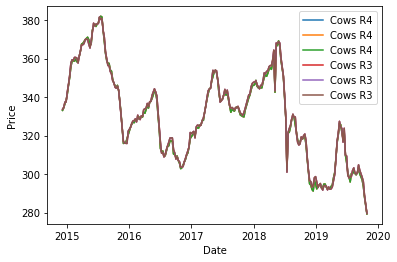

In [25]:
#line graph of Cows R4 & R3
plt.plot(df["Date"], df["Cows R4 (Ire)"], label = "Cows R4")
plt.plot(df["Date"], df["Cows R3 (Ire)"], label = "Cows R3")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

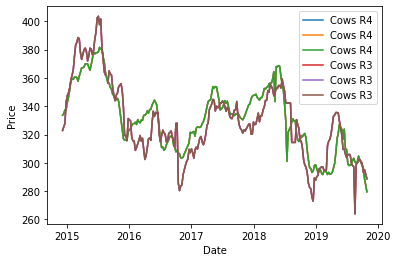

In [26]:
#line graph of Cows R4 & R3
plt.plot(df["Date"], df["Cows R3 (Ire)"], label = "Cows R4")
plt.plot(df["Date"], df["Cows R3 (GB)"], label = "Cows R3")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

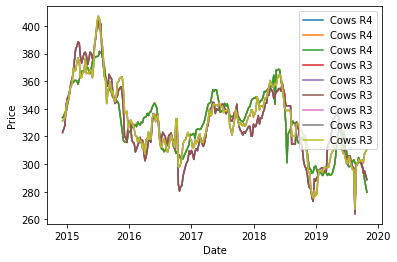

In [27]:
#line graph of Cows R4 & R3
plt.plot(df["Date"], df["Cows R3 (Ire)"], label = "Cows R4")
plt.plot(df["Date"], df["Cows R3 (GB)"], label = "Cows R3")
plt.plot(df["Date"], df["Cows R3 (NI)"], label = "Cows R3")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [28]:
df["Cows R3 (Ire)"]

0      279.6
1      288.9
2      296.1
3      298.4
4      302.0
       ...  
245    342.7
246    337.5
247    337.4
248    334.7
249    333.7
Name: Cows R3 (Ire), Length: 250, dtype: float64

In [29]:
df["Date"]

,Date,Date,Date
0,2019-10-28,2019-10-28,2019-10-28
1,2019-10-14,2019-10-14,2019-10-14
2,2019-10-07,2019-10-07,2019-10-07
3,2019-09-30,2019-09-30,2019-09-30
4,2019-09-16,2019-09-16,2019-09-16
...,...,...,...
245,2015-01-05,2015-01-05,2015-01-05
246,2014-12-29,2014-12-29,2014-12-29
247,2014-12-22,2014-12-22,2014-12-22
248,2014-12-15,2014-12-15,2014-12-15


In [30]:
#drop duplicate date columns
df2=df.T.drop_duplicates().T

In [31]:
df2['Date']

0     2019-10-28
1     2019-10-14
2     2019-10-07
3     2019-09-30
4     2019-09-16
         ...    
245   2015-01-05
246   2014-12-29
247   2014-12-22
248   2014-12-15
249   2014-12-08
Name: Date, Length: 250, dtype: datetime64[ns]

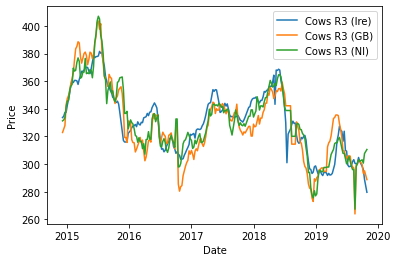

In [34]:
#line graph of Cows R4 & R3
plt.plot(df2["Date"], df2["Cows R3 (Ire)"], label = "Cows R3 (Ire)")
plt.plot(df2["Date"], df2["Cows R3 (GB)"], label = "Cows R3 (GB)")
plt.plot(df2["Date"], df2["Cows R3 (NI)"], label = "Cows R3 (NI)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
df2.shape

(250, 86)

In [36]:
df=df2

In [50]:
#adding month column and year column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [38]:
df.shape

(250, 88)

In [55]:
df_2019 = df.loc[df['year'].isin([2019])]
df_2018 = df.loc[df['year'].isin([2018])]
df_2017 = df.loc[df['year'].isin([2017])]
df_2016 = df.loc[df['year'].isin([2016])]
df_2015 = df.loc[df['year'].isin([2015])]
df_2014 = df.loc[df['year'].isin([2014])]

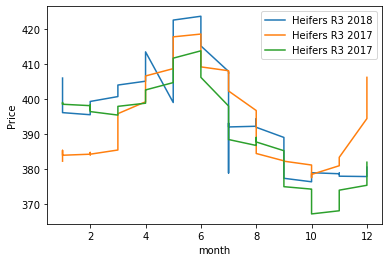

In [41]:
plt.plot(df_2018["month"], df_2018["Heifers R3 (Ire)"], label = "Heifers R3 2018")
plt.plot(df_2017["month"], df_2017["Heifers R3 (Ire)"], label = "Heifers R3 2017")
plt.plot(df_2016["month"], df_2016["Heifers R3 (Ire)"], label = "Heifers R3 2017")


plt.xlabel("month")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

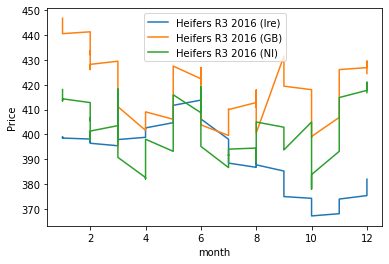

In [53]:
plt.plot(df_2016["month"], df_2016["Heifers R3 (Ire)"], label = "Heifers R3 2016 (Ire)")
plt.plot(df_2016["month"], df_2016["Heifers R3 (GB)"], label = "Heifers R3 2016 (GB)")
plt.plot(df_2016["month"], df_2016["Heifers R3 (NI)"], label = "Heifers R3 2016 (NI)")


plt.xlabel("month")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

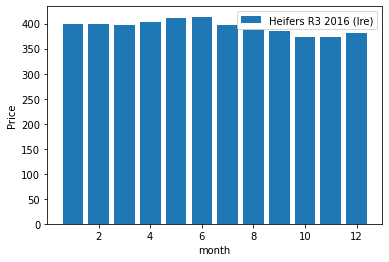

In [44]:
plt.bar(df_2016["month"], df_2016["Heifers R3 (Ire)"], label = "Heifers R3 2016 (Ire)")

plt.xlabel("month")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

In [46]:
df['week'] = pd.DatetimeIndex(df['Date']).week

<ipython-input-46-d24fcf6b192b>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = pd.DatetimeIndex(df['Date']).week


In [49]:
df['year']

0      44
1      42
2      41
3      40
4      38
       ..
245     2
246     1
247    52
248    51
249    50
Name: year, Length: 250, dtype: int64

In [51]:
df.head()

,Date,Bulls R3 (Ire),Cows O2 (Ire),Cows O3 (Ire),Cows O4 (Ire),Cows P2 (Ire),Cows P3 (Ire),Cows R3 (Ire),Cows R4 (Ire),Heifers O2 (Ire),...,Steers U4 (NI),Young Bulls O2 (NI),Young Bulls O3 (NI),Young Bulls R2 (NI),Young Bulls R3 (NI),Young Bulls U2 (NI),Young Bulls U3 (NI),month,year,week
0,2019-10-28,241.6,255.0,259.2,259.7,228.6,247.7,279.6,279.3,322.9,...,370.12,337.37,345.89,354.79,360.64,359.13,358.31,10,2019,44
1,2019-10-14,239.9,264.6,268.3,268.5,235.1,256.0,288.9,288.0,326.6,...,358.68,329.29,333.71,353.09,356.86,353.88,361.26,10,2019,42
2,2019-10-07,248.3,270.1,274.2,274.6,242.9,262.0,296.1,293.7,326.5,...,354.7,321.27,329.39,347.95,352.07,348.9,351.14,10,2019,41
3,2019-09-30,253.0,277.9,279.9,278.4,252.7,267.1,298.4,297.1,331.7,...,353.6,324.38,332.57,344.37,345.92,349.15,350.59,9,2019,40
4,2019-09-16,264.2,283.3,283.9,282.5,257.2,272.6,302.0,300.1,329.7,...,357.5,325.69,331.77,347.26,359.39,352.49,356.83,9,2019,38


In [54]:
df.tail()

,Date,Bulls R3 (Ire),Cows O2 (Ire),Cows O3 (Ire),Cows O4 (Ire),Cows P2 (Ire),Cows P3 (Ire),Cows R3 (Ire),Cows R4 (Ire),Heifers O2 (Ire),...,Steers U4 (NI),Young Bulls O2 (NI),Young Bulls O3 (NI),Young Bulls R2 (NI),Young Bulls R3 (NI),Young Bulls U2 (NI),Young Bulls U3 (NI),month,year,week
245,2015-01-05,320.4,312.7,316.3,317.7,282.5,306.8,342.7,341.6,368.0,...,469.06,422.81,418.0,446.34,452.93,448.82,453.8,1,2015,2
246,2014-12-29,346.5,306.8,315.6,316.8,291.0,308.4,337.5,338.1,364.9,...,463.01,402.24,402.77,437.51,436.89,442.56,446.76,12,2014,1
247,2014-12-22,309.9,304.9,313.9,313.8,276.8,304.6,337.4,336.6,358.8,...,449.42,403.04,407.06,425.99,438.04,443.97,447.43,12,2014,52
248,2014-12-15,299.3,303.3,310.4,311.7,275.1,299.2,334.7,334.4,360.4,...,447.03,400.9,404.9,423.73,435.71,441.61,445.05,12,2014,51
249,2014-12-08,280.2,303.4,310.6,311.6,275.8,299.3,333.7,333.1,357.1,...,437.6,391.07,401.83,412.85,423.39,425.55,422.63,12,2014,50


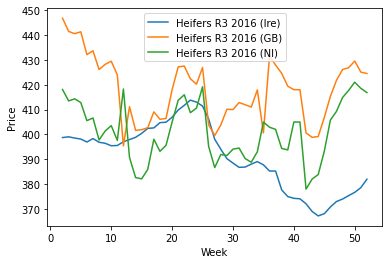

In [57]:
plt.plot(df_2016["week"], df_2016["Heifers R3 (Ire)"], label = "Heifers R3 2016 (Ire)")
plt.plot(df_2016["week"], df_2016["Heifers R3 (GB)"], label = "Heifers R3 2016 (GB)")
plt.plot(df_2016["week"], df_2016["Heifers R3 (NI)"], label = "Heifers R3 2016 (NI)")


plt.xlabel("Week")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

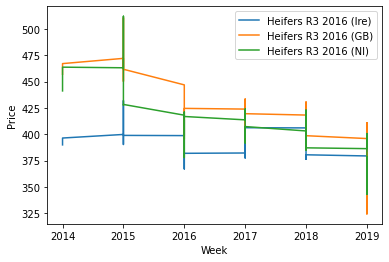

In [59]:
plt.plot(df["year"], df["Heifers R3 (Ire)"], label = "Heifers R3 2016 (Ire)")
plt.plot(df["year"], df["Heifers R3 (GB)"], label = "Heifers R3 2016 (GB)")
plt.plot(df["year"], df["Heifers R3 (NI)"], label = "Heifers R3 2016 (NI)")


plt.xlabel("Week")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

<Figure size 432x288 with 0 Axes>

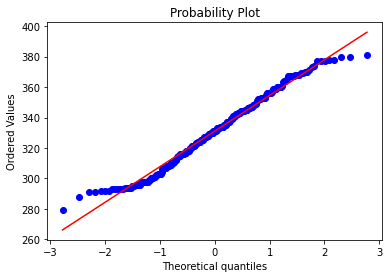

<Figure size 432x288 with 0 Axes>

In [93]:
#Normality plot. Our variable is "charges"
x = df["Cows R3 (Ire)"].astype(int)

stats.probplot(x , plot=plt)
plt.figure()

In [ ]:
#Shapiro wilk test

stats.shapiro(dataset.charges[dataset.region == "east"])

In [119]:
x = df["Cows R3 (Ire)"].astype(int)
y = x[df.month == 5]

y

24     307
25     299
26     296
27     293
28     292
76     364
77     359
78     356
79     356
80     355
126    344
127    344
128    343
129    339
178    335
179    336
180    334
181    333
229    370
230    369
231    367
232    367
Name: Cows R3 (Ire), dtype: int64

In [120]:
#Shapiro wilk test

stats.shapiro(y)

ShapiroResult(statistic=0.8813904523849487, pvalue=0.012843756936490536)

In [121]:
x = df["Cows R3 (Ire)"].astype(int)
y = x[df.year == 2017]
y

94     347
95     345
96     341
97     341
98     334
99     332
100    330
101    331
102    331
103    333
104    335
105    334
106    334
107    333
108    334
109    334
110    335
111    339
112    343
113    342
114    344
115    341
116    339
117    338
118    337
119    344
120    349
121    353
122    353
123    352
124    353
125    349
126    344
127    344
128    343
129    339
130    335
131    331
132    329
133    327
134    325
135    325
136    325
137    325
138    324
139    318
140    322
141    321
142    321
Name: Cows R3 (Ire), dtype: int64

In [122]:
#Shapiro wilk test

stats.shapiro(x)

ShapiroResult(statistic=0.9810703992843628, pvalue=0.002053596545010805)

In [109]:
x

0      279
1      288
2      296
3      298
4      302
      ... 
245    342
246    337
247    337
248    334
249    333
Name: Cows R3 (Ire), Length: 250, dtype: int64

In [114]:
z = df.iloc[1:5,:-3].astype(int)

In [115]:
stats.shapiro(z)

ShapiroResult(statistic=0.08112102746963501, pvalue=1.4578341311276947e-37)

In [123]:
x = df_1["Cows R3 (Ire)"]

In [124]:
sd1 = x.std()
sd1

23.40941071223229

In [125]:
x

0      279.6
1      288.9
2      296.1
3      298.4
4      302.0
       ...  
245    342.7
246    337.5
247    337.4
248    334.7
249    333.7
Name: Cows R3 (Ire), Length: 250, dtype: object

In [126]:
y = df_1["Cows R3 (GB)"]
y

0      288.79
1      295.12
2      293.35
3      299.64
4      302.45
        ...  
245    347.49
246    342.86
247    327.91
248    325.42
249    322.89
Name: Cows R3 (GB), Length: 250, dtype: object

In [131]:
z = [x.astype(int)] + [y.astype(int)]
z

ValueError: cannot convert float NaN to integer

In [144]:
z = [x] + [y]
z

[0      353.6
 1      355.4
 2      355.7
 3      357.0
 4      351.2
        ...  
 245    399.8
 246    396.4
 247    394.7
 248    392.2
 249    389.9
 Name: Heifers R3 (Ire), Length: 242, dtype: float64,
 0      382.10
 1      377.44
 2      368.36
 3      369.15
 4      370.54
         ...  
 245    471.97
 246    467.00
 247    462.95
 248    457.61
 249    456.92
 Name: Heifers R3 (GB), Length: 242, dtype: float64]

In [145]:
stats.shapiro(z)

ShapiroResult(statistic=0.9117629528045654, pvalue=3.5701401111408373e-16)

In [130]:
z

[0      279.6
 1      288.9
 2      296.1
 3      298.4
 4      302.0
        ...  
 245    342.7
 246    337.5
 247    337.4
 248    334.7
 249    333.7
 Name: Cows R3 (Ire), Length: 250, dtype: object,
 0      288.79
 1      295.12
 2      293.35
 3      299.64
 4      302.45
         ...  
 245    347.49
 246    342.86
 247    327.91
 248    325.42
 249    322.89
 Name: Cows R3 (GB), Length: 250, dtype: object]

In [142]:
x = df_1["Heifers R3 (Ire)"]
y = df_1["Heifers R3 (GB)"]
z = df_1["Heifers R3 (NI)"]

In [143]:
#perform Kruskal-Wallis Test 
stats.kruskal(x, y, z)

#(statistic=6.2878, pvalue=0.0431)

KruskalResult(statistic=172.602329312427, pvalue=3.3103995019539925e-38)

In [138]:
df["Heifers R3 (Ire)"].astype(int)

ValueError: cannot convert float NaN to integer

In [141]:
print(df_1.isnull().sum())

Date                   0
Bulls R3 (Ire)         0
Cows O2 (Ire)          0
Cows O3 (Ire)          0
Cows O4 (Ire)          0
                      ..
Young Bulls O3 (NI)    0
Young Bulls R2 (NI)    0
Young Bulls R3 (NI)    0
Young Bulls U2 (NI)    0
Young Bulls U3 (NI)    0
Length: 88, dtype: int64
